In [2]:
#TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
#importing the fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
#Exploring the data. We have 60,000 images in the training dataset which are represented as 28 x 28 pixels.
train_images.shape

(60000, 28, 28)

In [10]:
#chekcing the number of labels
len(train_labels)

60000

In [13]:
#the label is an integer between 0 and
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
#number of images in the test dataset
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

In [18]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

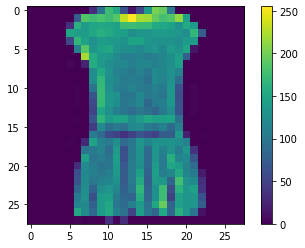

In [22]:
#pre-processing the data
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#from stackoverflow: RGB are 8 bit each. The range for each individual color is 0-255 as(2^8 = 256 possibilites)
#the combo can range from 256*256*256.

#By dividing by 255, the 0-255 range can be described with 0.0-1.0 range where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF)

train_images = train_images / 255.0

test_images = test_images / 255.0

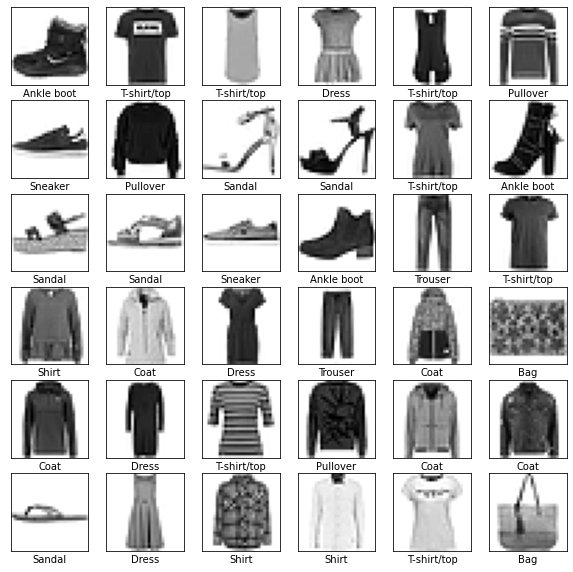

In [27]:
#verifying if the dataset we have is accurate

plt.figure(figsize = (10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Building the neural network requires configuring the layers of the model, then compiling the model.

Set up the layer:
basic building block of a nueral network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningfu; for the problem at hand. 

Most of deep learning consists of chaining together simple layers. Most Layers, such as tf.kera.layers.Dense, have parameters that are learned during training.

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10)
])

first layer: tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional arrat(28x28) to a 1-D array of (28x28 = 784 pixels). This is like unstacking rows of pixels in the image and lining them up. 

This layer has no parameters to learn, it only reformats the data.

After the pixels are flattened, the network consists of sequence of two tf.keras.layers.Dense layers. These are densely connected or fully connected, neural layers. The first dense layer has 128 nodes(or neurons). The second(and last) layers returns a logits array with length of 10. Each node contains a score that indiated the current image belongs to one of the 10 classes.

Before the model is ready for testing, there are a few settings:
1. Loss function- measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
2. Optimizer - This is how the model is updated based on the data it sees and its loss function.
3. Metrics - Used to monitor the training and testing steps. We're using "accuracy", the fraction of the images that are correctly classified.


In [0]:
model.compile( optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

Training the model

1. feeding the training data to the mode. In our example, the training data is in the train images and train labels arrays.
2. the model learns to associate images and labels.
3. We ask the model to make predictions about a test set- the test_images array. 
4. We verify that the predictions match the labels from the test_labels array.

In [30]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4951 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3706 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2937 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2572 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2472 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [31]:
#evaluating accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\n Test Accurac:', test_acc)

313/313 - 0s - loss: 0.3406 - accuracy: 0.8817

 Test Accurac: 0.8816999793052673


We observe that the model had a 91% accuracy on the training data and only 88% accuract on the test data. This gap is due to overfitting. It occurs when a model performs worse on new, unseen input than on the training data. An overfitted model memorizes the noise and details in the training dataset to point, wehere it -vely impacts the performance of the model on the new data.

In [0]:
#making predicitons
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [34]:
predictions[0]

array([2.6447164e-09, 1.6590446e-09, 1.4870445e-09, 9.1749462e-11,
       1.5291387e-09, 4.2300619e-04, 1.9370548e-08, 5.2922266e-03,
       7.1349726e-10, 9.9428469e-01], dtype=float32)

In [35]:
predictions[1]

array([6.6853667e-05, 6.1490379e-12, 9.9910045e-01, 3.9431889e-09,
       5.2119943e-04, 4.9666798e-18, 3.1160566e-04, 1.0071911e-13,
       2.0549473e-10, 2.0425968e-12], dtype=float32)

A prediction is an array of 10 numbers. They represent the models's confidence that the image corresponds to each of the 10 different articles of clothing.

In [36]:
#label with the highest confidence value
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

In [0]:
#graph this to look at the full set of 10 class predictions
def plot_image (i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color ='blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                   100*np.max(predictions_array),
                                   class_names[true_label]),color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

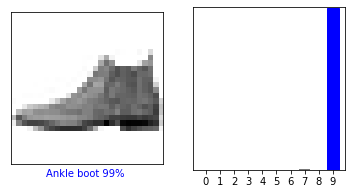

In [42]:
#displaying the predicted image
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

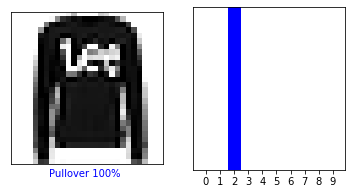

In [43]:
i = 1
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

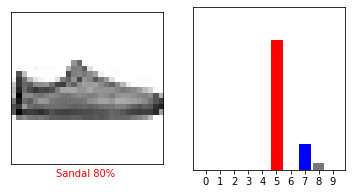

In [44]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()